In [10]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(
    '/home/rayan/Downloads/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_216063/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_216063.csv',
    skiprows=4
)

if 'Unnamed: 69' in data.columns:
    data = data.drop(columns=['Unnamed: 69'])

gdp_long = data.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='Year',
    value_name='GDP'
)


gdp_long = gdp_long[gdp_long['Year'].str.isnumeric()]

gdp_long['Year'] = gdp_long['Year'].astype(int)
gdp_long['GDP'] = pd.to_numeric(gdp_long['GDP'], errors='coerce')

print(gdp_long.head())
print(gdp_long.info())

output_path = "/home/rayan/Downloads/clean_world_gdp.csv"
gdp_long.to_csv(output_path, index=False)
print("Cleaned long-format GDP data saved at:", output_path)


                  Country Name Country Code     Indicator Name  \
0                        Aruba          ABW  GDP (current US$)   
1  Africa Eastern and Southern          AFE  GDP (current US$)   
2                  Afghanistan          AFG  GDP (current US$)   
3   Africa Western and Central          AFW  GDP (current US$)   
4                       Angola          AGO  GDP (current US$)   

   Indicator Code  Year           GDP  
0  NY.GDP.MKTP.CD  1960           NaN  
1  NY.GDP.MKTP.CD  1960  2.420993e+10  
2  NY.GDP.MKTP.CD  1960           NaN  
3  NY.GDP.MKTP.CD  1960  1.190511e+10  
4  NY.GDP.MKTP.CD  1960           NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    17290 non-null  object 
 1   Country Code    17290 non-null  object 
 2   Indicator Name  17290 non-null  object 
 3   Indicator Code  17290 non

In [11]:
gdp_long.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,GDP
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1960,2.420993e+10
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1960,1.190511e+10
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN


<Axes: xlabel='Year'>

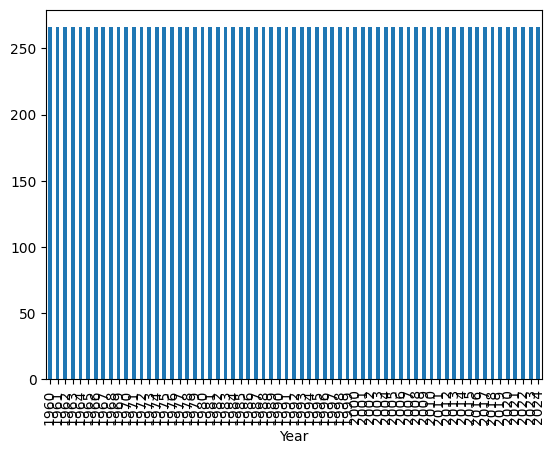

In [12]:
years_count=gdp_long['Year'].value_counts()
years_count.plot(kind='bar')

In [13]:
gdp_long['Country Name'].value_counts()

Country Name
Zimbabwe                       65
Aruba                          65
Africa Eastern and Southern    65
Afghanistan                    65
Africa Western and Central     65
                               ..
Austria                        65
Australia                      65
Antigua and Barbuda            65
American Samoa                 65
Armenia                        65
Name: count, Length: 266, dtype: int64

In [14]:
gdp_long = gdp_long.sort_values(['Country Name','Year'])
gdp_long['GDP_growth_pct'] = gdp_long.groupby('Country Name')['GDP'].pct_change()*100
gdp_long.head(10)


/tmp/ipykernel_20899/2933789735.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  gdp_long['GDP_growth_pct'] = gdp_long.groupby('Country Name')['GDP'].pct_change()*100


,Country Name,Country Code,Indicator Name,Indicator Code,Year,GDP,GDP_growth_pct
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN,NaN
268,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1961,NaN,NaN
534,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1962,NaN,NaN
800,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1963,NaN,NaN
1066,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1964,NaN,NaN
1332,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1965,NaN,NaN
1598,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1966,NaN,NaN
1864,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1967,NaN,NaN
2130,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1968,NaN,NaN
2396,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1969,NaN,NaN


In [15]:


sns.set(style="whitegrid")


print("Shape:", gdp_long.shape)
print("\nData Types:\n", gdp_long.dtypes)
print("\nMissing values:\n", gdp_long.isnull().sum())
print("\nDescriptive statistics:\n", gdp_long.describe())


Shape: (17290, 7)

Data Types:
 Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
Year                int64
GDP               float64
GDP_growth_pct    float64
dtype: object

Missing values:
 Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
Year                 0
GDP               2749
GDP_growth_pct    2921
dtype: int64

Descriptive statistics:
                Year           GDP  GDP_growth_pct
count  17290.000000  1.454100e+04    14369.000000
mean    1992.000000  1.231920e+12        8.098686
std       18.762206  5.703098e+12       15.732591
min     1960.000000  2.585956e+06      -99.773959
25%     1976.000000  2.359687e+09        1.189163
50%     1992.000000  1.759778e+10        7.287577
75%     2008.000000  2.081058e+11       13.980664
max     2024.000000  1.112530e+14      435.580737


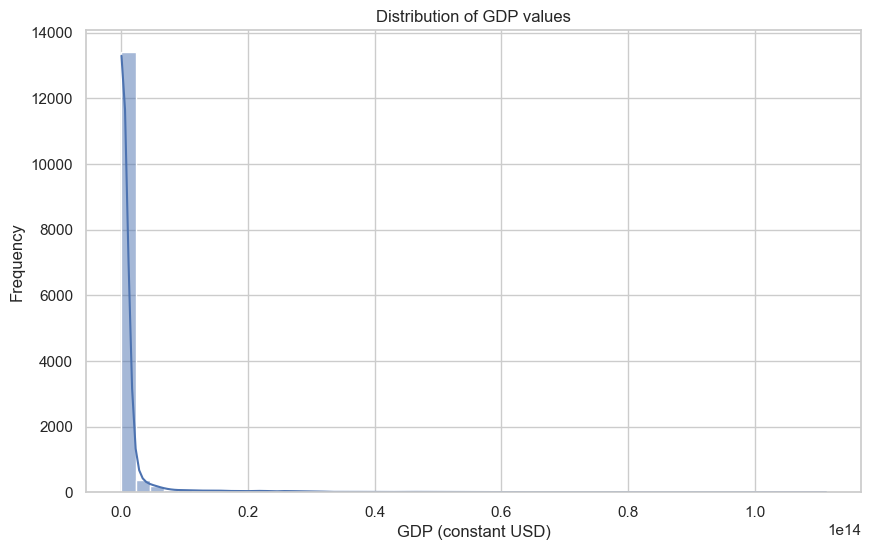

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(gdp_long['GDP'].dropna(), kde=True, bins=50)
plt.title("Distribution of GDP values")
plt.xlabel("GDP (constant USD)")
plt.ylabel("Frequency")
plt.show()



/tmp/ipykernel_20899/4140985804.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=gdp_long, x='Year', y='GDP', estimator='mean', ci=None)


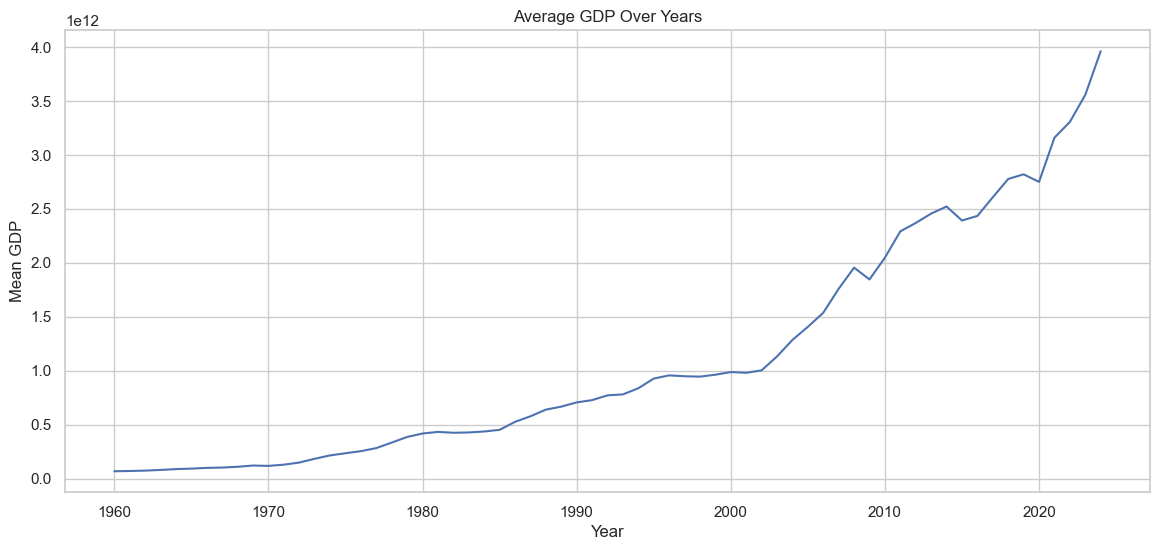

In [17]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=gdp_long, x='Year', y='GDP', estimator='mean', ci=None)
plt.title("Average GDP Over Years")
plt.xlabel("Year")
plt.ylabel("Mean GDP")
plt.show()

/tmp/ipykernel_20899/1971708952.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='GDP', y='Country Name', palette='viridis')


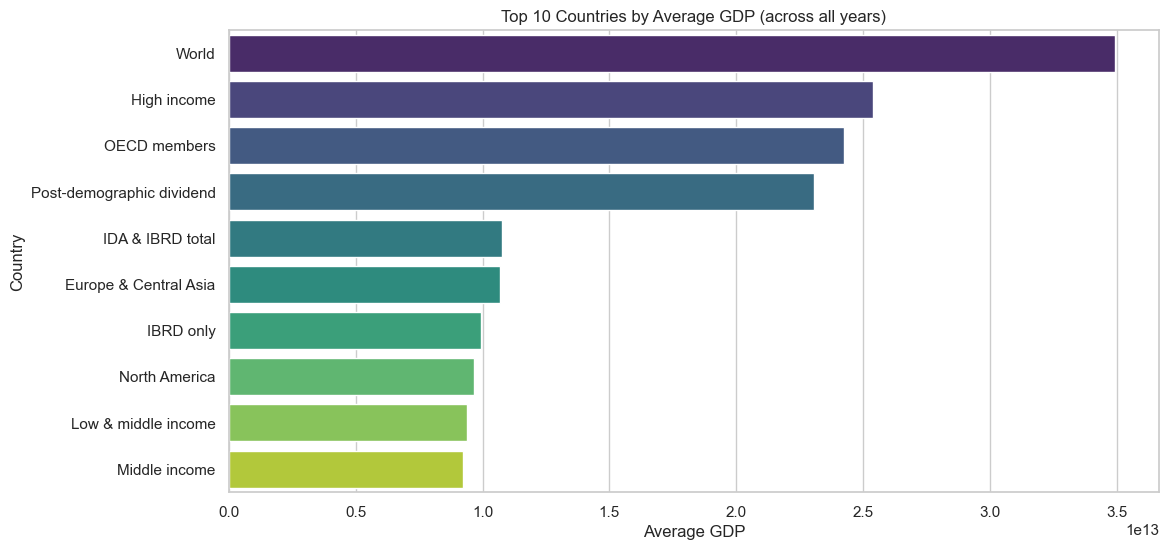

In [18]:
top10 = (gdp_long.groupby('Country Name')['GDP']
         .mean()
         .nlargest(10)
         .reset_index())

plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='GDP', y='Country Name', palette='viridis')
plt.title("Top 10 Countries by Average GDP (across all years)")
plt.xlabel("Average GDP")
plt.ylabel("Country")
plt.show()



/tmp/ipykernel_20899/3180309434.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  gdp_long['GDP_growth_pct'] = gdp_long.groupby('Country Name')['GDP'].pct_change() * 100


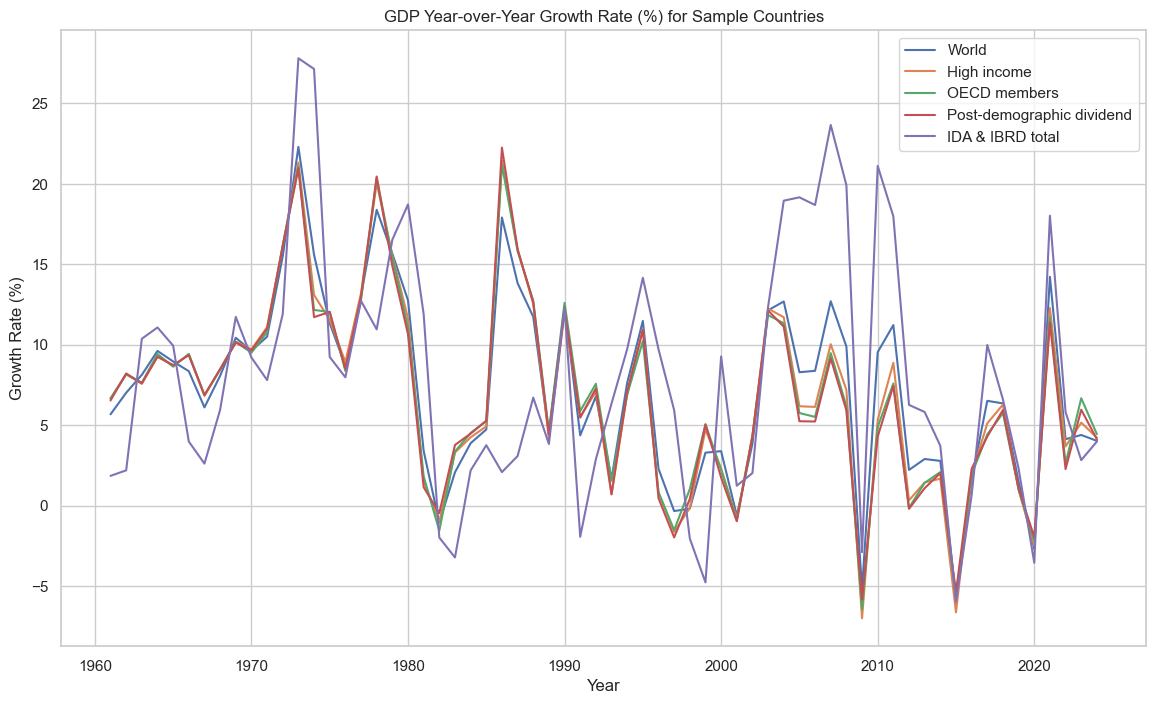

In [19]:
gdp_long = gdp_long.sort_values(['Country Name', 'Year'])
gdp_long['GDP_growth_pct'] = gdp_long.groupby('Country Name')['GDP'].pct_change() * 100

sample_countries = top10['Country Name'].tolist()[:5]  # first 5 of top 10
plt.figure(figsize=(14, 8))
for country in sample_countries:
    subset = gdp_long[gdp_long['Country Name'] == country]
    sns.lineplot(data=subset, x='Year', y='GDP_growth_pct', label=country)

plt.title("GDP Year-over-Year Growth Rate (%) for Sample Countries")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.legend()
plt.show()


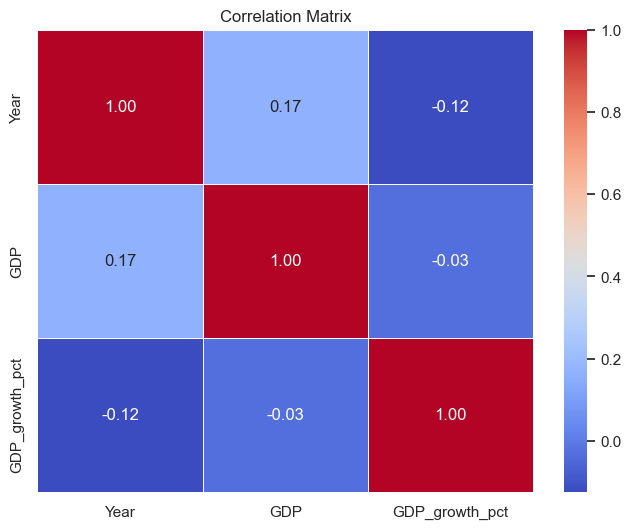

In [20]:

numeric_cols = gdp_long.select_dtypes(include=['float64', 'int64']).columns
corr = gdp_long[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()